In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('Ecommerce Customers')
df = data.copy()
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [70]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [71]:
#EDA

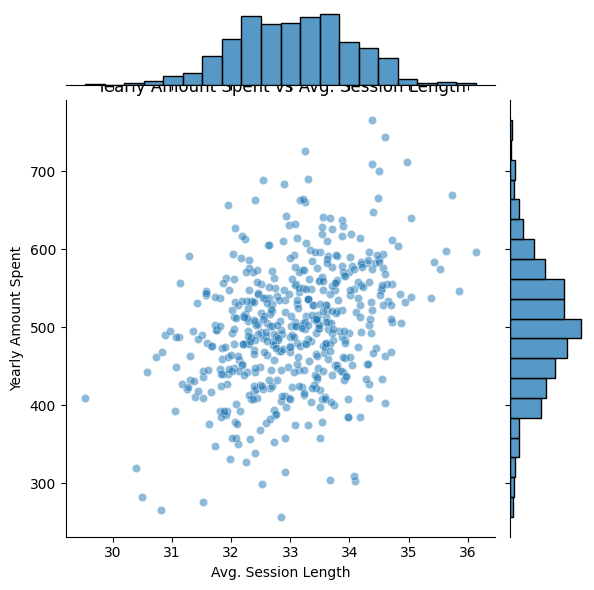

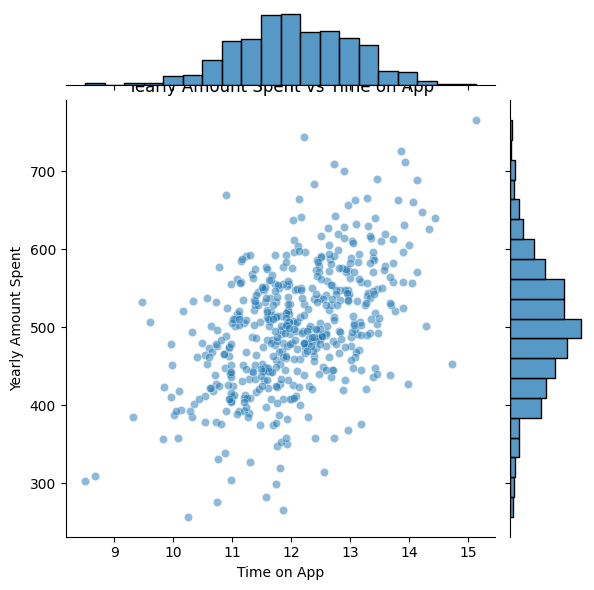

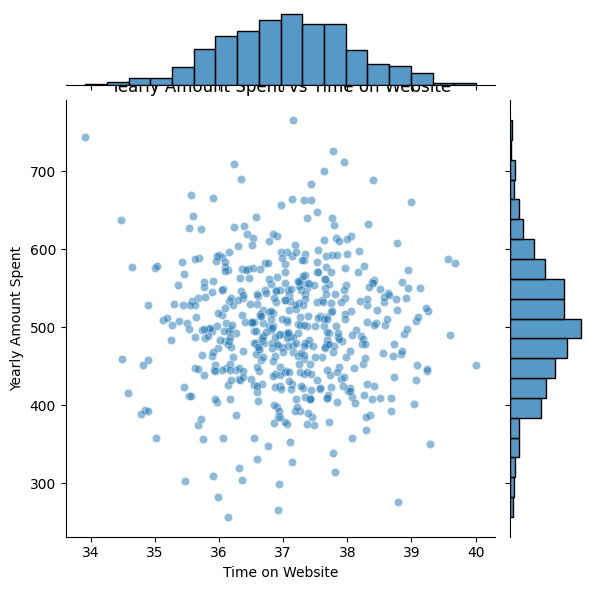

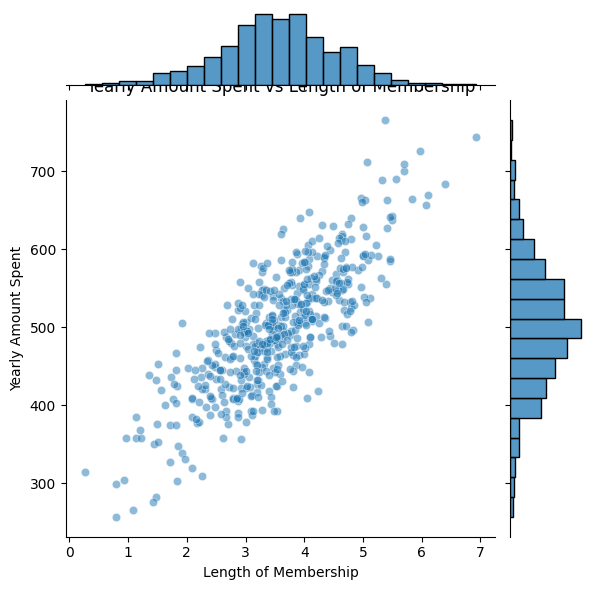

In [72]:
for i in df.columns:
    if df[i].dtypes != "object" and i != "Yearly Amount Spent":
        sns.jointplot(x=i,y="Yearly Amount Spent",data=df,alpha=0.5)
        plt.title(f"Yearly Amount Spent vs {i}")
        plt.show()

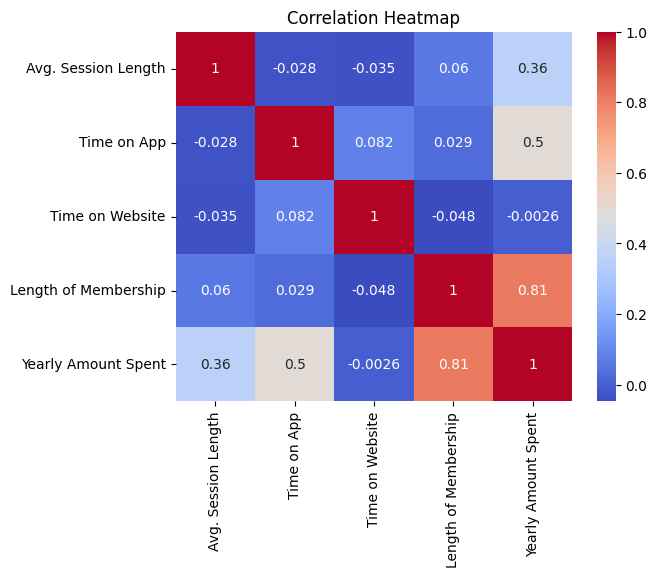

In [73]:
#  Heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [74]:
# VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
def calculate_vif(df):
    coln = []
    for i in df.columns:
        if df[i].dtype != "object" and i != "Yearly Amount Spent":
            coln.append(i)
    data = df[coln]

    vif = pd.DataFrame()
    vif["Columns"] = data.columns
    vif["VIF"] = 0
    vif_values = []
    for i in range(len(coln)):
        v = variance_inflation_factor(data.values, i)
        vif_values.append(v)

    vif["VIF"] = vif_values
    print(vif)

calculate_vif(df)

                Columns         VIF
0   Avg. Session Length  613.185924
1           Time on App  144.019714
2       Time on Website  658.495572
3  Length of Membership   13.578801


In [77]:
vif_df = df.copy()
vif_df = vif_df.drop(['Time on Website', 'Email', 'Address', 'Avatar'], axis=1)
vif_df.columns

Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Yearly Amount Spent'],
      dtype='object')

In [78]:
calculate_vif(vif_df)

                Columns         VIF
0   Avg. Session Length  137.810683
1           Time on App  128.886271
2  Length of Membership   13.577181


In [79]:
vif_df = vif_df.drop('Avg. Session Length',axis=1)
vif_df.columns

Index(['Time on App', 'Length of Membership', 'Yearly Amount Spent'], dtype='object')

In [80]:
calculate_vif(vif_df)

                Columns        VIF
0           Time on App  12.671665
1  Length of Membership  12.671665


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
vif_df.columns


Index(['Time on App', 'Length of Membership', 'Yearly Amount Spent'], dtype='object')

In [83]:
x = vif_df.drop('Yearly Amount Spent',axis=1)
x.head()

,Time on App,Length of Membership
0,12.655651,4.082621
1,11.109461,2.664034
2,11.330278,4.104543
3,13.717514,3.120179
4,12.795189,4.446308


In [84]:
y = vif_df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
le = LinearRegression()

In [88]:
model = le.fit(x_train,y_train)

In [89]:
model.coef_

array([37.38336738, 63.91070167])

In [90]:
y_pred = model.predict(x_test)

In [91]:
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_data.head()

,Actual,Predicted
90,449.070319,449.467410
254,482.602467,497.705652
283,374.269675,367.092290
445,513.153112,538.259809
461,502.771075,505.744079


In [92]:
from sklearn.metrics import  mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse, r2

(936.7407255550044, 0.8607589368801648)

<Axes: xlabel='Yearly Amount Spent'>

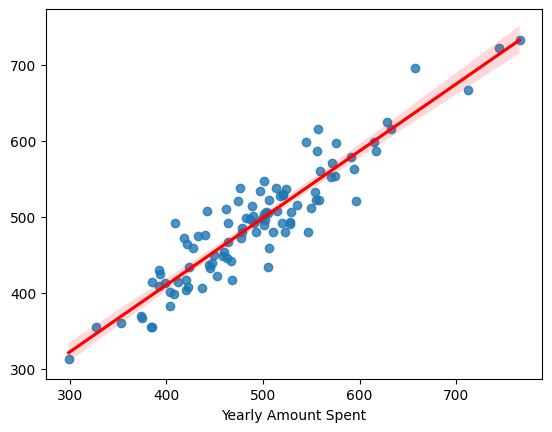

In [93]:
sns.regplot(x=y_test,y=y_pred, line_kws={"color": "red"})

In [94]:
vif_df.columns

Index(['Time on App', 'Length of Membership', 'Yearly Amount Spent'], dtype='object')

Index(['Length of Membership'], dtype='object')
Yearly Amount Spent
MSE; 2627.2128470978655, R2 Score: 0.6094800835575334


<Axes: xlabel='Yearly Amount Spent'>

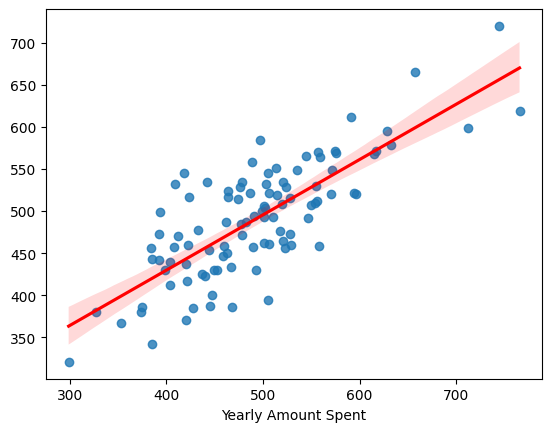

In [95]:
x = vif_df.drop(['Yearly Amount Spent','Time on App'],axis=1)
y = vif_df['Yearly Amount Spent']
print(x.columns)
print(y.name)
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=0.2,random_state=0)

model2 = le.fit(x1_train,y1_train)

y1_pred = model2.predict(x1_test)

mse = mean_squared_error(y1_test,y1_pred)
r2 = r2_score(y1_test,y1_pred)
print(f"MSE; {mse}, R2 Score: {r2}")

sns.regplot(x=y1_test,y=y1_pred, line_kws={"color": "red"})


Index(['Time on App'], dtype='object')
Yearly Amount Spent
MSE; 5096.184058781203, R2 Score: 0.24248186628308943


<Axes: xlabel='Yearly Amount Spent'>

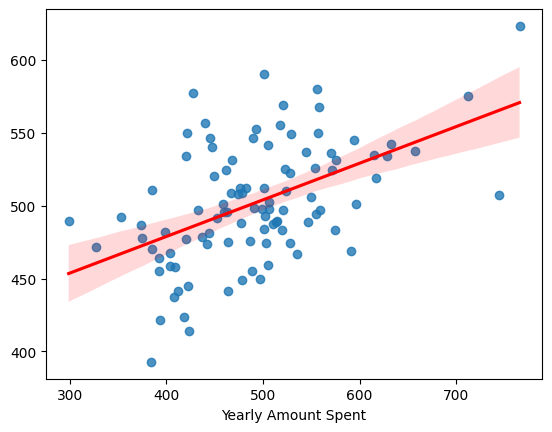

In [96]:
x = vif_df.drop(['Yearly Amount Spent','Length of Membership'],axis=1)
y = vif_df['Yearly Amount Spent']
print(x.columns)
print(y.name)
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y,test_size=0.2,random_state=0)

model3 = le.fit(x2_train,y2_train)

y2_pred = model3.predict(x2_test)

mse = mean_squared_error(y2_test,y2_pred)
r2 = r2_score(y2_test,y2_pred)
print(f"MSE; {mse}, R2 Score: {r2}")

sns.regplot(x=y2_test,y=y2_pred, line_kws={"color": "red"})
